<a href="https://colab.research.google.com/github/Paperfloat/week-2-/blob/main/WM_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [9]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [15]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [16]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [17]:
#visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
     for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:04<00:00, 2087.41it/s]


In [18]:
data.shape

(22564, 2)

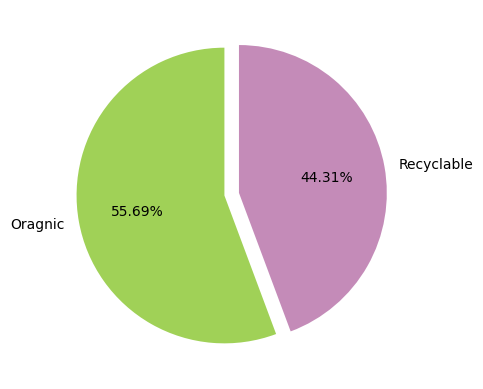

In [19]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Oragnic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90, explode=[0.05, 0.05])
plt.show()

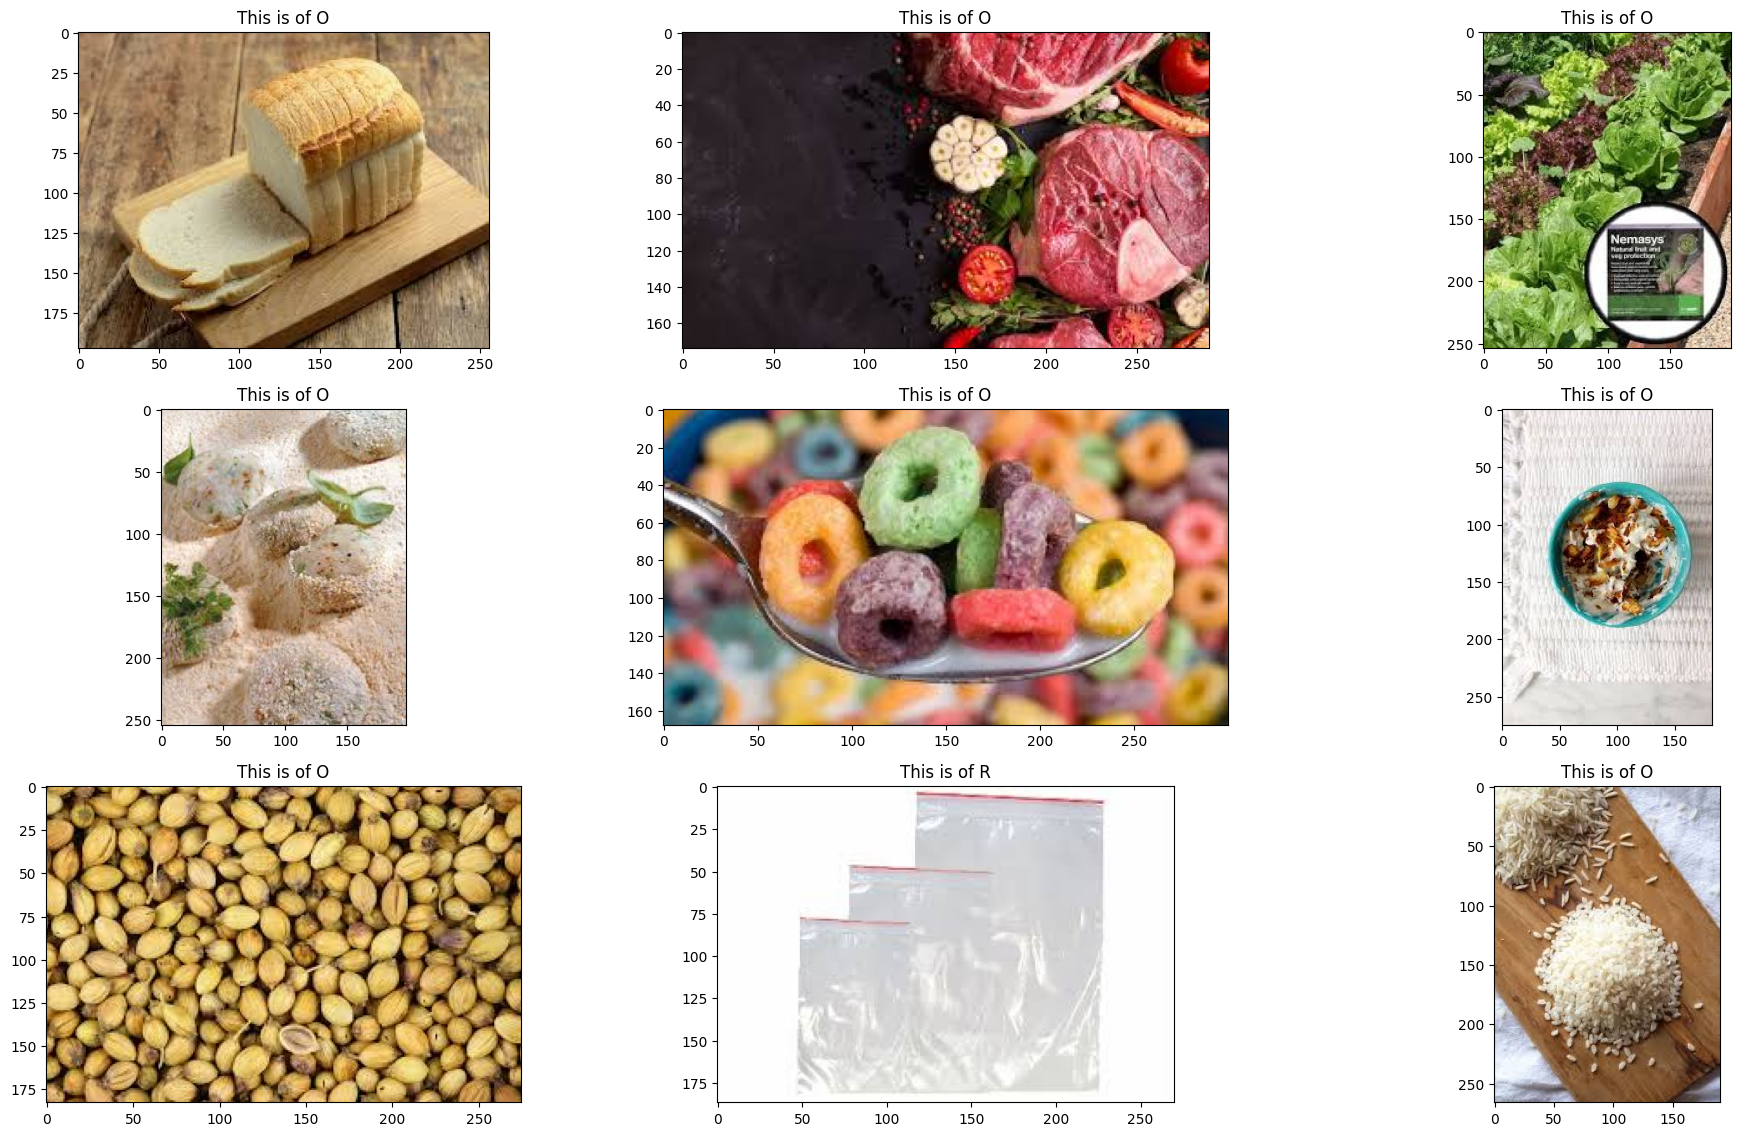

In [20]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolution Neural Network

In [47]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 32



In [48]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_29 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,811,905 (182.39 MB)

 Trainable params: 47,811,905 (182.39 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [43]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [49]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "binary"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "binary"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [50]:
hist = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

Epoch 1/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - accuracy: 0.7731 - loss: 0.5811 - val_accuracy: 0.8627 - val_loss: 0.3365
Epoch 2/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 46s 65ms/step - accuracy: 0.8421 - loss: 0.3806 - val_accuracy: 0.8663 - val_loss: 0.3212
Epoch 3/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.8647 - loss: 0.3281 - val_accuracy: 0.8945 - val_loss: 0.2740
Epoch 4/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - accuracy: 0.8967 - loss: 0.2644 - val_accuracy: 0.8922 - val_loss: 0.3058
Epoch 5/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.9317 - loss: 0.1840 - val_accuracy: 0.8890 - val_loss: 0.3410
Epoch 6/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.9575 - loss: 0.1208 - val_accuracy: 0.8862 - val_loss: 0.4417
Epoch 7/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.9718 - loss: 0.0793 - val_accuracy: 0.8810 - val_loss: 0.5917
Epoch 8/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.9809 - loss: 0.0569 - 